In [3]:
#IMPORT NECESSARY PACKAGES
import CO2_functions
import CO2_Processing
import pandas as pd
from CO2_functions import *
from CO2_Processing import *
import matplotlib.pyplot as plt
import pickle
import numpy as np
pd.options.display.max_rows = 999
from datetime import datetime
import os

In [4]:
import importlib
importlib.reload(CO2_functions)
importlib.reload(CO2_Processing)

from CO2_functions import *
from CO2_Processing import *

In [23]:
data = retrieve_data_from_folder('../CO2_Data_Final','2019-11-06','2019-11-27')

Retrieving data for 2019-11-06
Retrieving data for 2019-11-07
Retrieving data for 2019-11-08
Retrieving data for 2019-11-09
Retrieving data for 2019-11-10
Retrieving data for 2019-11-11
Retrieving data for 2019-11-12
Retrieving data for 2019-11-13
Retrieving data for 2019-11-14
Retrieving data for 2019-11-15
Retrieving data for 2019-11-16
Retrieving data for 2019-11-17
Retrieving data for 2019-11-18
Retrieving data for 2019-11-19
Retrieving data for 2019-11-20
Retrieving data for 2019-11-21
Retrieving data for 2019-11-22
Retrieving data for 2019-11-23
Retrieving data for 2019-11-24
Retrieving data for 2019-11-25
Retrieving data for 2019-11-26
Retrieving data for 2019-11-27


In [24]:
data = remove_spikes(pd.read_pickle('Spike_ETs.pkl'),data)
data = downsample_and_concatenate(data) 
data = combine_vent_data(data,1)
data['Vent_Mass'] = moving_mass_flow(data['Vent_Mass'])

Concatenating Picarro Data
Concatenating Multi Data
setting night vent data to zero


In [28]:
for key in data:
    data[key] = pd.concat([\
                               data[key].loc[(data[key].index>'2019-11-06 00:00:00')&(data[key].index<'2019-11-25 12:00:00')],\
                               data[key].loc[(data[key].index>'2019-11-25 17:00:00')&(data[key].index<'2019-11-27 10:28:00')]])


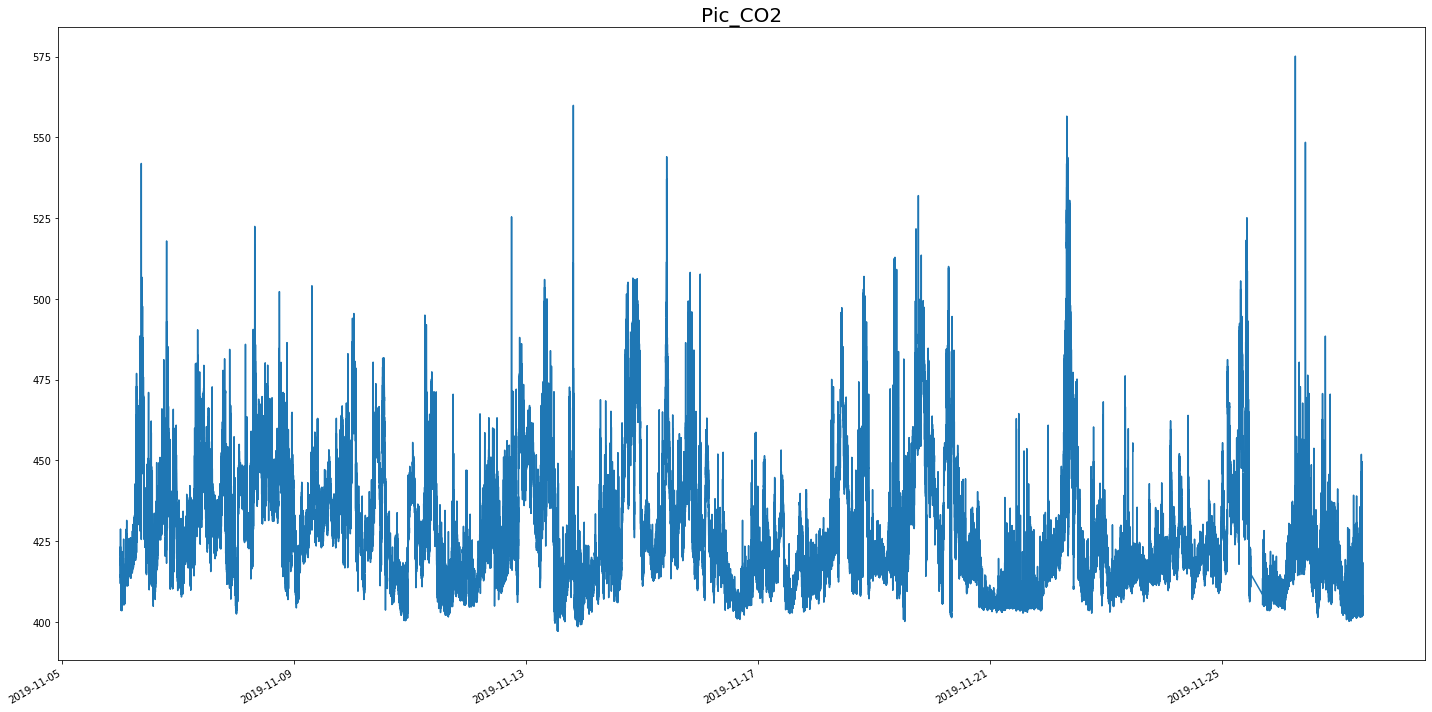

Is this an acceptable range? y


[                    Corrected_DT     Pic_CO2   Pic_CH4  Pic_Loc    ANEM_Y  \
 0        2019-11-06 00:00:00.100  419.795619  1.802057      6.0 -0.170000   
 1        2019-11-06 00:00:00.200  419.786901  1.801311      6.0 -0.170000   
 2        2019-11-06 00:00:00.300  420.033968  1.800509      6.0 -0.175745   
 3        2019-11-06 00:00:00.400  420.166470  1.799493      6.0 -0.169091   
 4        2019-11-06 00:00:00.500  419.689297  1.794874      6.0 -0.155413   
 ...                          ...         ...       ...      ...       ...   
 18340793 2019-11-27 10:27:59.500  403.732343  1.759182      6.0 -2.456850   
 18340794 2019-11-27 10:27:59.600  403.625397  1.760828      6.0 -2.056243   
 18340795 2019-11-27 10:27:59.700  404.097719  1.766502      6.0 -1.818723   
 18340796 2019-11-27 10:27:59.800  404.043172  1.766512      6.0 -2.187872   
 18340797 2019-11-27 10:27:59.900  404.171347  1.768172      6.0 -2.121468   
 
             ANEM_X    ANEM_Z  DOW  
 0        -0.691277 -0.13

In [29]:
plot_refinement_all([[data['Picarro'],'Corrected_DT','Pic_CO2']\
#                     ,[data['Picarro'],'Corrected_DT','Pic_CH4']\
#                     ,[data['Picarro'],'Corrected_DT','ANEM_X']\
#                     ,[data['Picarro'],'Corrected_DT','ANEM_Y']\
#                     ,[data['Picarro'],'Corrected_DT','ANEM_Z']\
#                     ,[data['WBB_Weather'],'Corrected_DT','ws']\
#                     ,[data['Picarro'],'Corrected_DT','ws']\
#                     ,[data['Picarro'],'Corrected_DT','wd']\
#                     ,[data['Vent_Mass'],'Corrected_DT','m_dot']\
                     
                    ],'separate')

In [92]:
#pic.set_index('Corrected_DT',inplace=True)
pic_10 = pic.resample("10T").agg(dict(Pic_CO2='max',Pic_CH4='max',ANEM_Y='mean',ANEM_X='mean',ANEM_Z='mean',Pic_Loc = 'last'))
pic_10 = wind_add(pic_10,'ANEM_X','ANEM_Y')

In [26]:
#Import everything to view graphics
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.lib import grdevices
base = importr('base')
utils = importr('utils')
import IPython
from IPython.display import Image, display
graphics = importr('graphics')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
if not ro.packages.isinstalled('openair'):
    utils.install_packages('openair')

df = multi1

r=ro.r #set r object to "r"
r.library('openair') #load library openair

pandas2ri.activate() #activate the pandas to r dataframe function
r_dataframe = pandas2ri.py2ri(df) #convert pandas df to r df

with rpy2.robjects.lib.grdevices.render_to_bytesio(grdevices.png, width=900, height=700, res=150) as img: #graphical settings
    #r.polarAnnulus(r_dataframe,poll = pollutant,period='hour',main='Hour',width = 'fat')  # setup plot through r
    r.polarPlot(r_dataframe,poll='CO2_2',statistic='cpf',percentile=80)  # setup plot through r

IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True)) #display plot

RRuntimeError: Error in file(file, "rt") : cannot open the connection
